In [3]:
import os
import csv
import tweepy
import datetime
import numpy as np
from tweepy import TweepError
from matplotlib import pylab as plt

%matplotlib inline

In [4]:
# Get hashtag participants
keyword = '#feijóosalvados'
participants = []
timestamps = []

with open("../tracked/"+keyword+".txt", 'r') as f:
    for line in f.readlines():
        if line[0:5] != "LINE:":
            continue
        info = line.split("LINE:")[1]
        uid = int(info.split('\t')[1]) #ids
        timestamp = float(info.split('\t')[2]) #epochs
        
        participants.append(uid)
        timestamps.append(timestamp)


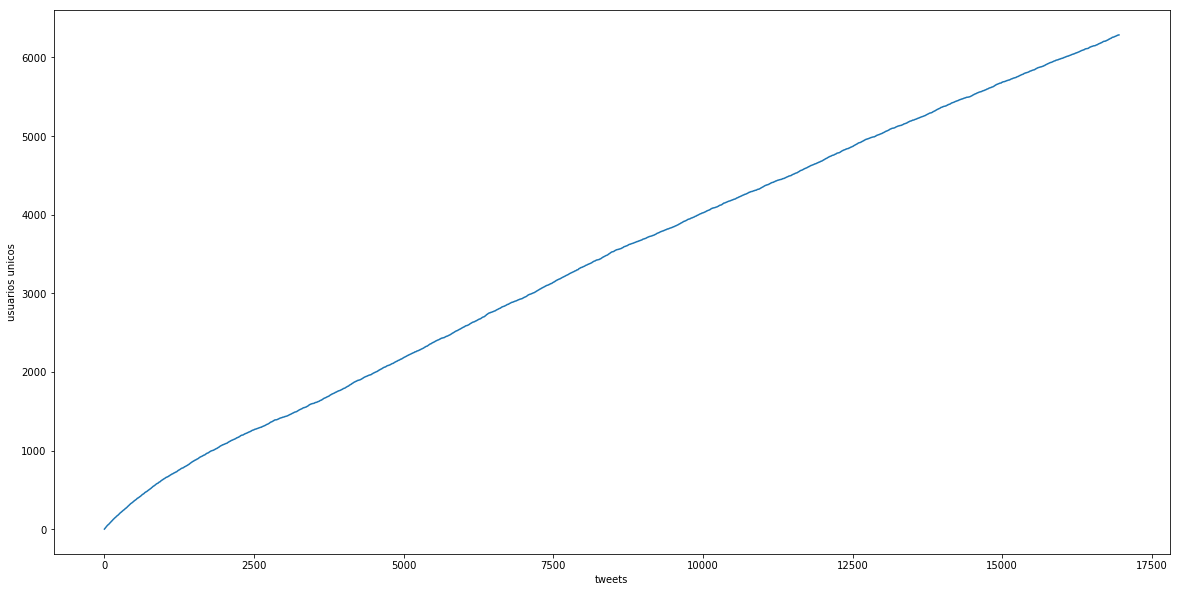

In [6]:
# Plot unique users
plt.figure(figsize=(20,10)) 
y = np.zeros(len(participants), dtype=np.int16)
unique_participants = set()
for i in range(len(participants)):
    unique_participants.add(participants[i])
    y[i] = len(unique_participants)
    
plt.plot(y)
plt.xlabel("tweets")
plt.ylabel("usuarios unicos")

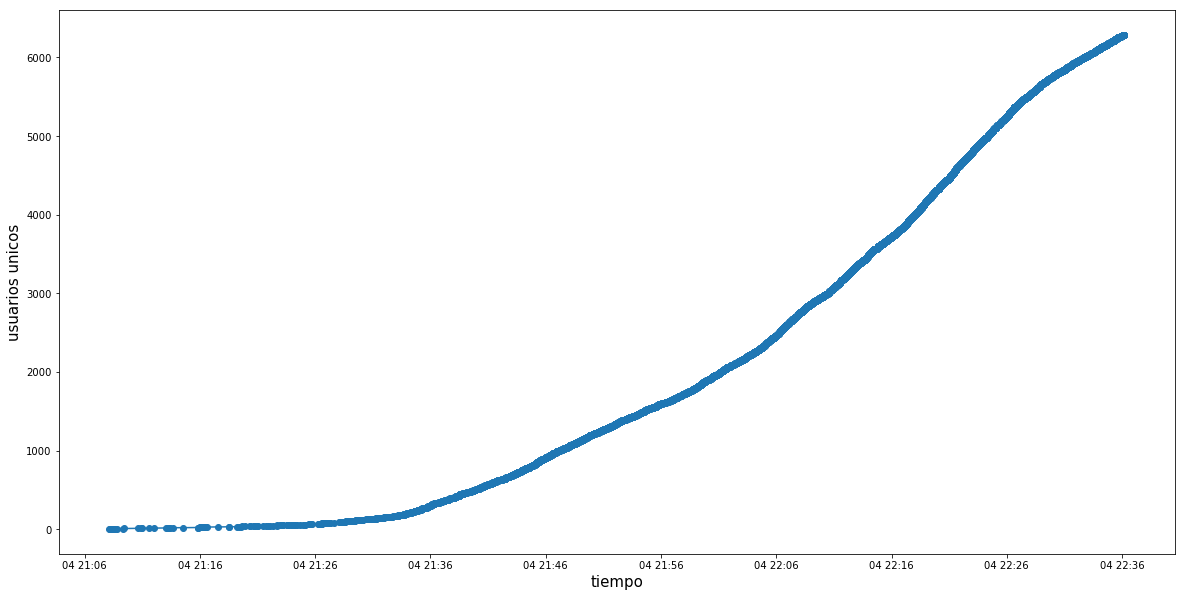

In [7]:
# Plot where x are dates
import datetime

dates = []
for i, ts in enumerate(timestamps):
    dates.append(datetime.datetime.fromtimestamp(ts))

fig = plt.figure(figsize=(20,10)) 
ax = plt.gca()

ax.plot_date(dates, y, 'o-', label="added")
ax.set_xlabel('tiempo', fontsize=15)
ax.set_ylabel('usuarios unicos', fontsize=15)